In [1]:
import pandas as pd
import json
import io
import matplotlib.pyplot as plt
import numpy as np
from pandas import json_normalize
from sqlalchemy import create_engine


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
#user data

user_df = pd.read_csv("USER_TAKEHOME.csv")


#converting to appropriate date format for date fields
user_df['CREATED_DATE'] = pd.to_datetime(user_df['CREATED_DATE'])
user_df['CREATED_DATE'] = user_df['CREATED_DATE'].dt.date

user_df['BIRTH_DATE'] = pd.to_datetime(user_df['BIRTH_DATE'])
user_df['BIRTH_DATE'] = user_df['BIRTH_DATE'].dt.date
user_df.head(5)

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24,2000-08-11,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03,2001-09-24,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31,1994-10-28,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26,NaT,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28,1972-03-19,PA,en,female


In [5]:
#transactions data

trans_df = pd.read_csv('TRANSACTION_TAKEHOME.csv')

#converting to appropriate date format for date fields
trans_df['SCAN_DATE'] = pd.to_datetime(trans_df['SCAN_DATE'])
trans_df['SCAN_DATE'] = trans_df['SCAN_DATE'].dt.date

trans_df['PURCHASE_DATE'] = pd.to_datetime(trans_df['PURCHASE_DATE'])
trans_df['PURCHASE_DATE'] = trans_df['PURCHASE_DATE'].dt.date

trans_df.head(5)

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,


In [7]:
#products data

prod_df = pd.read_csv('PRODUCTS_TAKEHOME.csv')

prod_df.head(5)

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11


# Exploratory Analysis

In [10]:
#removing duplicate records

print("--------Users--------")
print(user_df.shape)
clean_user_df = user_df.drop_duplicates()
print(clean_user_df.shape)

print("--------Transactions--------")
print(trans_df.shape)
clean_trans_df = trans_df.drop_duplicates()
print(clean_trans_df.shape)

print("--------Products--------")
print(prod_df.shape)
clean_prod_df = prod_df.drop_duplicates()
print(clean_prod_df.shape)



--------Users--------
(100000, 6)
(100000, 6)
--------Transactions--------
(50000, 8)
(49829, 8)
--------Products--------
(845552, 7)
(845337, 7)


In [12]:
# #null values

print("--------Users--------")
print(clean_user_df.isnull().sum())

print("--------Transactions--------")
print(clean_trans_df.isnull().sum())

print("--------Products--------")
print(clean_prod_df.isnull().sum())



--------Users--------
ID                  0
CREATED_DATE        0
BIRTH_DATE       3675
STATE            4812
LANGUAGE        30508
GENDER           5892
dtype: int64
--------Transactions--------
RECEIPT_ID           0
PURCHASE_DATE        0
SCAN_DATE            0
STORE_NAME           0
USER_ID              0
BARCODE           5735
FINAL_QUANTITY       0
FINAL_SALE           0
dtype: int64
--------Products--------
CATEGORY_1         111
CATEGORY_2        1422
CATEGORY_3       60563
CATEGORY_4      777884
MANUFACTURER    226464
BRAND           226462
BARCODE           3968
dtype: int64


In [14]:
#code First part of the assessment answers

#duplicate records example
# prod_df[prod_df['BARCODE']==3498507.0]

#'zero' quantity - datatype issue
#print(list(clean_trans_df['FINAL_QUANTITY'].unique()))

#blank and 0 sale values
# print(list(sorted(clean_trans_df['FINAL_SALE'].unique())))

#language code context
#print(list(clean_user_df['LANGUAGE'].unique()))

#barcode with two values of CATEGORY_3
#clean_prod_df[clean_prod_df['BARCODE']==87108538.0]

In [16]:
#cleaning the inconsistent values in FINAL_SALE and FINAL_QUANTITY columns
clean_trans_df.loc[clean_trans_df['FINAL_SALE'] == ' ', 'FINAL_SALE']= '0.00'
clean_trans_df.loc[clean_trans_df['FINAL_QUANTITY'] == 'zero', 'FINAL_QUANTITY']= '0.00'

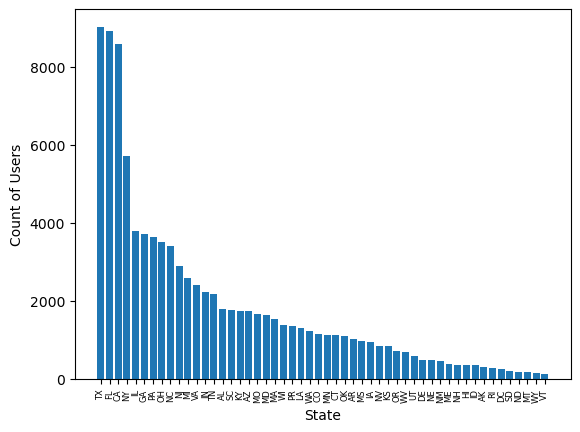

In [20]:
#Exploratory analysis through data visualization

#user dataset

state_counts = clean_user_df['STATE'].value_counts()

plt.bar(state_counts.index, state_counts.values)

plt.xlabel('State')
plt.ylabel('Count of Users')
plt.xticks(rotation=90, fontsize=6)
plt.show()


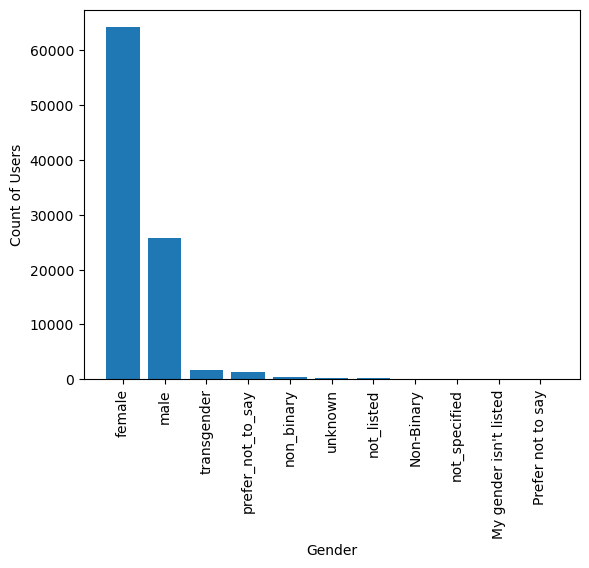

In [22]:

#user dataset

gender_counts = clean_user_df['GENDER'].value_counts()

plt.bar(gender_counts.index, gender_counts.values)

plt.xlabel('Gender')
plt.ylabel('Count of Users')
plt.xticks(rotation=90)
plt.show()


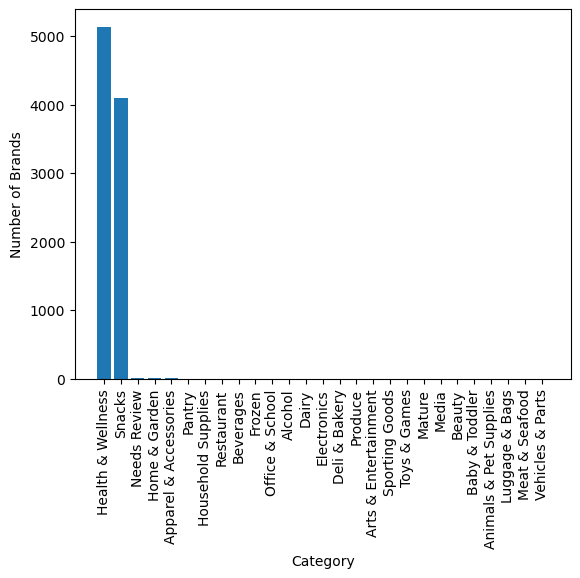

In [24]:

#products dataset

brand_counts = clean_prod_df.groupby('CATEGORY_1')['BRAND'].nunique().sort_values(ascending=False)

plt.bar(brand_counts.index, brand_counts.values)

plt.xlabel('Category')
plt.ylabel('Number of Brands')
plt.xticks(rotation=90)
plt.show()


# Exporting the datasets to PostgreSQL for second part

In [46]:
engine = create_engine('postgresql+psycopg2://<username>:<password>@localhost:5432/<DatabaseName>')
clean_user_df.to_sql('users', engine, if_exists='replace', index=False)
clean_trans_df.to_sql('transactions', engine, if_exists='replace', index=False)
clean_prod_df.to_sql('products', engine, if_exists='replace', index=False)


337